# Is there disporpotionate disciplinary action in CMS?

This document strives to explore differences in the treatment of students based on race in the Charlotte Mecklenburg school system. The [Civil Rights Data Collection](https://ocrdata.ed.gov/) has agregated the data used within.

This document will use a subset of the data that CRDC has collected and explain how the data is being manipulated. 

## To begin, we need to import some libraries.

This project is written in python and will use the following libraries to make the annalysis process easier:
* pandas: used for data manipulation
* numpy: handles lots of heavier math opperations
* matplotlib: responsible for displaying visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the data

When the data is grabbed from CRDC's website, it is stored in a `.csv` file. CSV stands for Comma Sepperated Values which is very descriptive of how the information is stored. A CSV is essentially a text file with rows of data seperated by commas to form the columns. The program cannot dirrectly manipulate the data in this state, so it must be read into memory. 

In [2]:
full_data = pd.read_csv('Data Files\Data Files and Layouts\CRDC 2015-16 School Data.csv', encoding='windows-1252', index_col='SCH_NAME')
full_data.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,6,23,24,25,30,31,1828) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(96360, 1835)

In [3]:
nces_cms_data = pd.read_csv('Data Files\\Data Files and Layouts\\NCES CMS Data.csv', encoding='windows-1252', index_col='SCH_NAME')
nces_cms_data.shape

(175, 25)

### What we actually have

This file is massive. The full dataset has 96,360 rows and 1,836 columns. This is much more than is required for this project since this project is only interested in schools within CMS and only interested in information about discipline disporpotionality. The full data set contains much more data than is wanted here, so much of the data needs to be removed.

--This next section of code will select only schools that are in CMS

In [4]:
cms_schools = full_data[63467:63635]

cms_data = pd.concat([cms_schools,nces_cms_data], axis=1, join='inner', sort=False)
cms_data.shape

(155, 1860)

Now, a list of all of the schools in the CMS district are contained in the varaible `cms_schools`. This subset of the origional data contains 168 schools, all of which are in CMS. From here analysis of this data can be started.

We also have the `cms_data` table which conatains a combination of data from NCES and CRDC which gives us more data to work with when analyzing the schools. This list only has 155 schools in it which means that the data sets have a different number of schools in CMS which is interesting and might be explored later.

### What can be done with visualization?

This data set has loads of data, so the sky is the limit. Some posibilities to explore is the demographics of the school district, the divide distribution of enrollement between various grades, and so much more. 

Let us first see which schools have a high percentage of students eligable for free or reduced price lunches

In [5]:
count = 0
print("High FRPL Ratio:")
print('---')
for i, school in cms_data.iterrows():
    frpl_ratio = (pd.to_numeric(school[1859])+pd.to_numeric(school[1858]))/pd.to_numeric(school[1855])
    if frpl_ratio > .75:
        count = count + 1
        print(i, '\t\t', frpl_ratio)
print()
print('High FRPL Schools:', count)

High FRPL Ratio:
---
Lake Wylie Elementary 		 0.9953125
University Meadows Elementary 		 0.9952830188679245
David Cox Road Elementary 		 0.9858906525573192
Turning Point Academy 		 0.9846153846153847
Albemarle Road Elementary 		 0.9880073800738007
Albemarle Road Middle 		 0.997270245677889
Allenbrook Elementary 		 0.9941634241245136
Ashley Park PreK-8 School 		 0.9943714821763602
Barringer Academic Center 		 0.9907407407407407
Berryhill School 		 0.9868173258003766
Briarwood Elementary 		 0.9959946595460614
Billingsville Elementary 		 0.9782608695652174
Cochrane Collegiate Academy 		 0.9924242424242424
Coulwood STEM Academy 		 0.9959731543624161
Devonshire Elementary 		 0.9887820512820513
First Ward Creative Arts Acad 		 0.9930675909878682
Reid Park Academy 		 0.9956709956709957
Druid Hills Academy 		 0.9938524590163934
Eastway Middle 		 0.9962732919254659
Harding University High 		 0.998165137614679
Hickory Grove Elementary 		 0.9801980198019802
Hidden Valley Elementary 		 0.996703296

In [6]:
count = 0
print("Low FRPL Ratio:")
print('---')
for i, school in cms_data.iterrows():
    frpl_ratio = (pd.to_numeric(school[1859])+pd.to_numeric(school[1858]))/pd.to_numeric(school[1855])
    if frpl_ratio < .25:
        count = count + 1
        print(i, '\t\t', frpl_ratio)
print()
print('High FRPL Schools:', count)

Low FRPL Ratio:
---
South Charlotte Middle 		 0.1583949313621964
Bain Elementary 		 0.19656283566058003
Beverly Woods Elementary 		 0.10843373493975904
Cornelius Elementary 		 0.23941368078175895
Davidson Elementary 		 0.12926136363636365
Eastover Elementary 		 0.2328159645232816
Olde Providence Elementary 		 0.14565826330532214
Park Road Montessori 		 0.09496124031007752
Selwyn Elementary 		 0.12974296205630356
Sharon Elementary 		 0.11551925320886815
Elizabeth Lane Elem 		 0.09099264705882353
McKee Road Elementary 		 0.128
Providence High 		 0.09544364508393285
Crestdale Middle 		 0.1950261780104712
Hawk Ridge Elementary 		 0.09350057012542759
Jay M Robinson Middle 		 0.0863674851820491
Providence Spring Elementary 		 0.028511087645195353
Chantilly Montessori 		 0.10541310541310542
Community House Middle 		 0.14262295081967213
Torrence Creek Elementary 		 0.1877076411960133
Elon Park Elementary 		 0.061096136567834684
Bailey Middle 		 0.1761786600496278
Highland Creek Elementary 		 0

As we can see here, there are 77 schools where 75% or more of the students qualify for FRPL where as there are only 32 schools where less than 25% qualify for the program

Let's examine the possible existence of a 'Gifted Gap' by plotting the proportion of students in gifted education compared to the FRPL ratio

y=-0.185894x+(0.206550) r= -0.7473249361111016


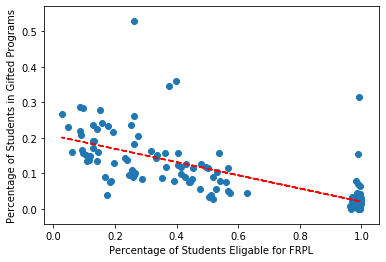

In [7]:
frpl_ratio_list = []
gifted_ratio_list = []
for i, school in cms_data.iterrows():
    frpl_ratio_list.append((pd.to_numeric(school[1859])+pd.to_numeric(school[1858]))/pd.to_numeric(school[1855]))
    gifted_ratio_list.append((pd.to_numeric(school[161])+pd.to_numeric(school[162]))/(pd.to_numeric(school[68])+pd.to_numeric(school[69])))
    if(gifted_ratio_list[-1] < 0):
        gifted_ratio_list[-1] = 0

frpl_ratios = pd.Series(frpl_ratio_list, index=cms_data.index)
gifted_ratios = pd.Series(gifted_ratio_list, index=cms_data.index)

r = frpl_ratios.corr(gifted_ratios)

plt.scatter(frpl_ratios, gifted_ratios)

z = np.polyfit(frpl_ratios, gifted_ratios, 1)
p = np.poly1d(z)
plt.plot(frpl_ratios,p(frpl_ratios),"r--")
print ("y=%.6fx+(%.6f)"%(z[0],z[1]), 'r=',r)

plt.xlabel('Percentage of Students Eligable for FRPL')
plt.ylabel('Percentage of Students in Gifted Programs')

plt.show()

In [8]:
gifted_ratios.head()

SCH_NAME
Lake Wylie Elementary            0.020408
South Charlotte Middle           0.242529
University Meadows Elementary    0.011611
Irwin Academic Center            0.528600
Crown Point Elementary           0.045255
dtype: float64

y=-0.357034x+(0.371537) r= -0.7366879958455975


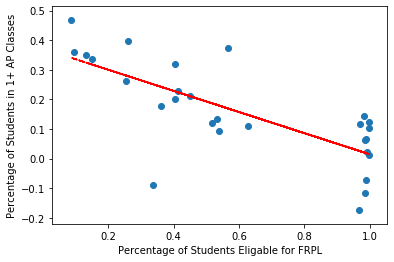

In [9]:
frpl_ratio_list = []
ap_ratio_list = []
high_schools = []
for i, school in cms_data.iterrows():
    if pd.to_numeric(school[1840]) >= 9:
        frpl_ratio_list.append((pd.to_numeric(school[1859])+pd.to_numeric(school[1858]))/pd.to_numeric(school[1855]))
        ap_ratio_list.append((pd.to_numeric(school[507])+pd.to_numeric(school[508]))/(pd.to_numeric(school[68])+pd.to_numeric(school[69])))
        high_schools.append(i)

frpl_ratios = pd.Series(frpl_ratio_list, index=high_schools)
ap_ratios = pd.Series(ap_ratio_list, index=high_schools)

r = frpl_ratios.corr(ap_ratios)

plt.scatter(frpl_ratios, ap_ratios)

z = np.polyfit(frpl_ratios, ap_ratios, 1)
p = np.poly1d(z)
plt.plot(frpl_ratios,p(frpl_ratios),"r--")
print ("y=%.6fx+(%.6f)"%(z[0],z[1]), 'r=',r)

plt.xlabel('Percentage of Students Eligable for FRPL')
plt.ylabel('Percentage of Students in 1+ AP Classes')

plt.show()